nr of spikes: 0


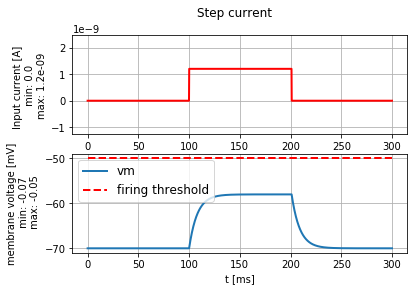

nr of spikes: 5


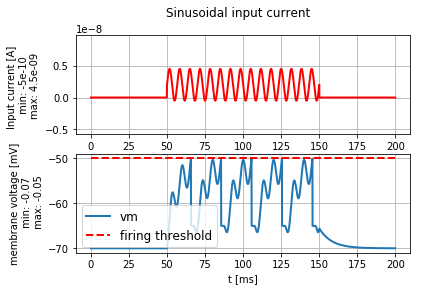

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools
LIF.getting_started()
LIF.print_default_parameters()

# 2.1. Exercise: minimal current

In [2]:
"""2.1.1"""
i_min=(LIF.FIRING_THRESHOLD - LIF.V_REST)/LIF.MEMBRANE_RESISTANCE #i_min = 2. nA
print(i_min)


2. nA


In [ ]:
"""2.1.2"""
# create a step current with amplitude= i_min
step_current = input_factory.get_step_current(t_start=5, t_end=100, 
                                              unit_time=b2.ms,amplitude= i_min) 

# run the LIF model.
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0])) 


In [32]:
"""2.2.1"""
LIF.ABSOLUTE_REFRACTORY_PERIOD= 3 * b2.ms
Is = np.linspace(0,100,5)*b2.namp
f = 1.0 / (LIF.ABSOLUTE_REFRACTORY_PERIOD + LIF.MEMBRANE_TIME_SCALE * np.log(Is*LIF.MEMBRANE_RESISTANCE/(Is*LIF.MEMBRANE_RESISTANCE - LIF.FIRING_THRESHOLD)))




WARNING    /home/yamini/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
 [py.warnings]


# 2.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron

Resting potential: -0.066
Reset voltage: -0.063
Firing threshold: -0.038
Membrane resistance: 13000000.0
Membrane time-scale: 0.013
Absolute refractory period: 0.005


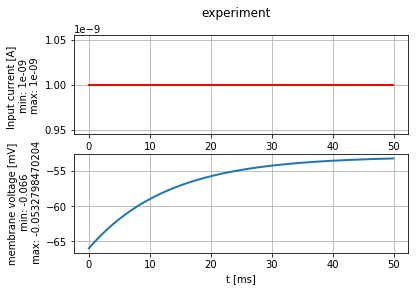

In [28]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=0, t_end=50, unit_time=b2.ms, amplitude= 1* b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
LIF.print_obfuscated_parameters(random_parameters)

# 2.4. Exercise: Sinusoidal input current and subthreshold response

nr of spikes: 0


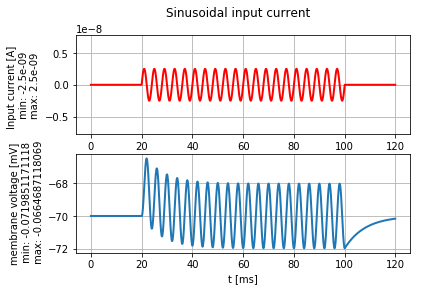

In [33]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0])
"""The maximum value in the voltage graph is the amplitude i.e.,-0.071"""

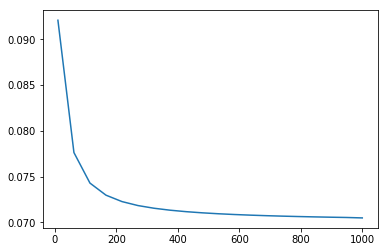

In [49]:
f = np.linspace(10,1000,20)*b2.Hz
amp = []
for i in f:
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=i,
                                            direct_current=0. * b2.namp)

    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)
    amp.append(abs(np.min(state_monitor.v[0])))

plt.plot(f,amp)








